In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from useful_functions_with_batch import *
from opt_function_with_batch import *
from network_utils import *

In [135]:
d=10
L_total=204800

In [136]:
h_global, y_global, x_opt = init_global_data(d=d, L_total=L_total, seed=42)
print("h:",h_global.shape)
print("y:",y_global.shape)

h: (204800, 10)
y: (204800,)


In [137]:
n=1
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A= generate_exponential_weight_matrix(n=n)
print("h_tilde:",h_tilde.shape,'\n')
L1 = PullDiag_GD_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=5e-2,
    sigma_n=0,
    max_it=10000,
    batch_size=200
)

h_tilde: (1, 204800, 10) 



In [122]:
n=2
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A= generate_exponential_weight_matrix(n=n)
print("h_tilde:",h_tilde.shape,'\n')
L2 = PullDiag_GD_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=2.6e-2,
    sigma_n=0,
    max_it=10000,
    batch_size=200
)

h_tilde: (2, 102400, 10) 



In [123]:
n=8
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A= generate_exponential_weight_matrix(n=n)
print("h_tilde:",h_tilde.shape,'\n')
L3 = PullDiag_GD_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=6.4e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200
)

h_tilde: (8, 25600, 10) 



In [124]:
n=16
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A= generate_exponential_weight_matrix(n=n)
print("h_tilde:",h_tilde.shape,'\n')
L4 = PullDiag_GD_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=3e-3,
    sigma_n=0,
    max_it=10000,
    batch_size=200
)

h_tilde: (16, 12800, 10) 



In [125]:
n=128
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A= generate_exponential_weight_matrix(n=n)
print("h_tilde:",h_tilde.shape,'\n')
L5 = PullDiag_GD_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=4e-4,
    sigma_n=0,
    max_it=10000,
    batch_size=200
)

h_tilde: (128, 1600, 10) 



In [ ]:
n=512
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A= generate_exponential_weight_matrix(n=n)
print("h_tilde:",h_tilde.shape,'\n')
L6 = PullDiag_GD_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-4,
    sigma_n=0,
    max_it=10000,
    batch_size=200
)

h_tilde: (512, 400, 10) 



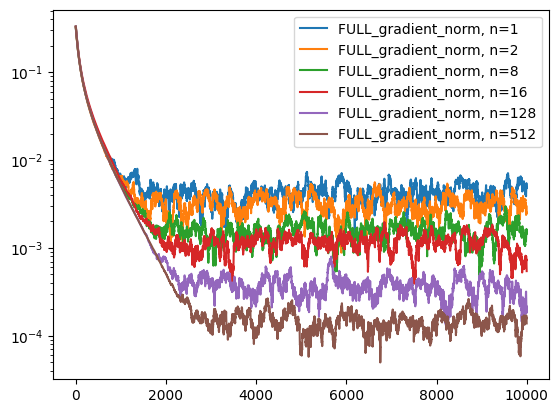

In [139]:
import matplotlib.pyplot as plt
plt.semilogy(L1["gradient_norm_on_full_trainset"],label="FULL_gradient_norm, n=1")
plt.semilogy(L2["gradient_norm_on_full_trainset"],label="FULL_gradient_norm, n=2")
plt.semilogy(L3["gradient_norm_on_full_trainset"],label="FULL_gradient_norm, n=8")
plt.semilogy(L4["gradient_norm_on_full_trainset"],label="FULL_gradient_norm, n=16")
plt.semilogy(L5["gradient_norm_on_full_trainset"],label="FULL_gradient_norm, n=128")
plt.semilogy(L6["gradient_norm_on_full_trainset"],label="FULL_gradient_norm, n=512")
plt.legend()
plt.show()

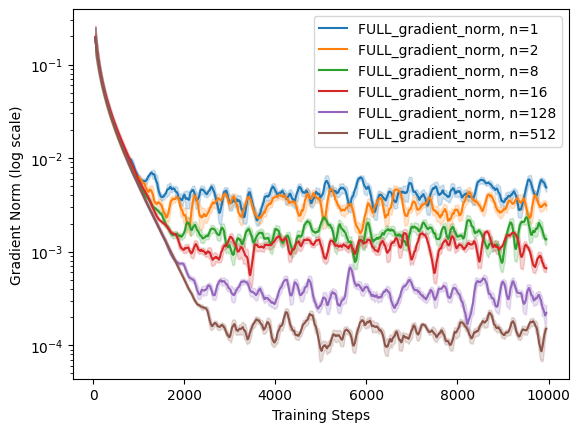

In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 定义移动平均窗口大小（根据数据调整）
window_size = 100

# 数据集和标签
data_list = [
    L1["gradient_norm_on_full_trainset"],
    L2["gradient_norm_on_full_trainset"],
    L3["gradient_norm_on_full_trainset"],
    L4["gradient_norm_on_full_trainset"],
    L5["gradient_norm_on_full_trainset"],
    L6["gradient_norm_on_full_trainset"],
]
labels = [
    "n=1",
    "n=2",
    "n=8",
    "n=16",
    "n=128",
    "n=512",
]

plt.figure()

for data, label in zip(data_list, labels):
    s = pd.Series(data)
    # 计算移动平均和标准差
    ma = s.rolling(window=window_size, center=True).mean()
    std = s.rolling(window=window_size, center=True).std()
    # 计算上下边界
    upper = ma + std
    lower = ma - std
    # 去除NaN值
    valid = ~ma.isna()
    x = np.arange(len(data))[valid]
    # 绘制均值实线
    (line,) = plt.semilogy(x, ma[valid], label=f"FULL_gradient_norm, {label}")
    color = line.get_color()
    # 填充震荡区域（均值±标准差）
    plt.fill_between(x, lower[valid], upper[valid], color=color, alpha=0.2)

plt.xlabel("Training Steps")
plt.ylabel("Gradient Norm (log scale)")
plt.legend()

# 保存为 PDF 文件
plt.savefig("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GD_指数图_没有重复实验_1.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [140]:
import pandas as pd

# 假设 L1 到 L6 是包含 gradient_norm_on_full_trainset 的字典
data = {
    "FULL_gradient_norm_n=1": L1["gradient_norm_on_full_trainset"],
    "FULL_gradient_norm_n=2": L2["gradient_norm_on_full_trainset"],
    "FULL_gradient_norm_n=8": L3["gradient_norm_on_full_trainset"],
    "FULL_gradient_norm_n=16": L4["gradient_norm_on_full_trainset"],
    "FULL_gradient_norm_n=128": L5["gradient_norm_on_full_trainset"],
    "FULL_gradient_norm_n=512": L6["gradient_norm_on_full_trainset"]
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 保存为 CSV 文件
df.to_csv("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GD_指数图.csv", index=False)

print("数据已保存到 gradient_norms.csv")

数据已保存到 gradient_norms.csv


In [2]:
import pandas as pd
df1 = pd.read_csv("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GD_指数图,重复20次,lr=0.05,n=1.csv")
df2 = pd.read_csv("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GD_指数图,重复20次,lr=0.026,n=2.csv")
df3 = pd.read_csv("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GD_指数图,重复20次,lr=0.0064,n=8.csv")
df4 = pd.read_csv("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GD_指数图,重复20次,lr=0.003,n=16.csv")
df5 = pd.read_csv("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GD_指数图,重复20次,lr=0.0004,n=128.csv")
df6 = pd.read_csv("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GD_指数图,重复20次,lr=0.0001,n=512.csv")

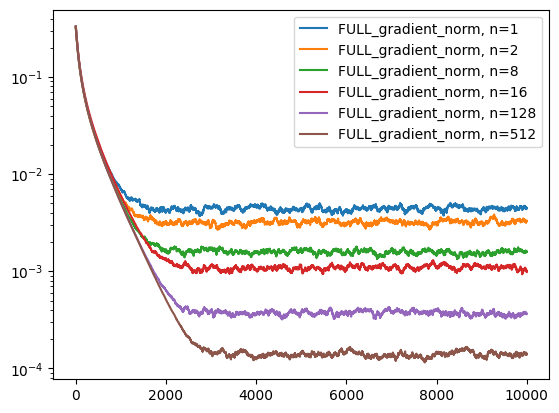

In [3]:
import matplotlib.pyplot as plt
plt.semilogy(df1["average_gradient_norm"],label="FULL_gradient_norm, n=1")
plt.semilogy(df2["average_gradient_norm"],label="FULL_gradient_norm, n=2")
plt.semilogy(df3["average_gradient_norm"],label="FULL_gradient_norm, n=8")
plt.semilogy(df4["average_gradient_norm"],label="FULL_gradient_norm, n=16")
plt.semilogy(df5["average_gradient_norm"],label="FULL_gradient_norm, n=128")
plt.semilogy(df6["average_gradient_norm"],label="FULL_gradient_norm, n=512")
plt.legend()
plt.show()

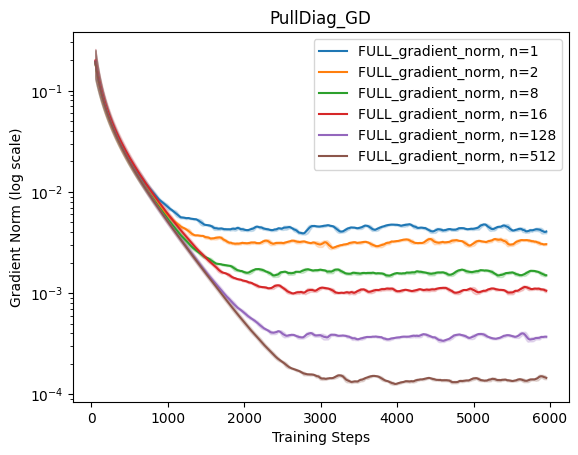

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 定义移动平均窗口大小（根据数据调整）
window_size = 100

s=6000
# 数据集和标签
data_list = [
    df1["average_gradient_norm"][:s],
    df2["average_gradient_norm"][:s],
    df3["average_gradient_norm"][:s],
    df4["average_gradient_norm"][:s],
    df5["average_gradient_norm"][:s],
    df6["average_gradient_norm"][:s],
]
labels = [
    "n=1",
    "n=2",
    "n=8",
    "n=16",
    "n=128",
    "n=512",
]

plt.figure()

for data, label in zip(data_list, labels):
    s = pd.Series(data)
    # 计算移动平均和标准差
    ma = s.rolling(window=window_size, center=True).mean()
    std = s.rolling(window=window_size, center=True).std()
    # 计算上下边界
    upper = ma + std
    lower = ma - std
    # 去除NaN值
    valid = ~ma.isna()
    x = np.arange(len(data))[valid]
    # 绘制均值实线
    (line,) = plt.semilogy(x, ma[valid], label=f"FULL_gradient_norm, {label}")
    color = line.get_color()
    # 填充震荡区域（均值±标准差）
    plt.fill_between(x, lower[valid], upper[valid], color=color, alpha=0.2)

plt.xlabel("Training Steps")
plt.ylabel("Gradient Norm (log scale)")
plt.title("PullDiag_GD")
plt.legend()

# 保存为 PDF 文件
plt.savefig("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GD_指数图_20次重复实验.pdf", format="pdf", bbox_inches="tight")

plt.show()